In [1284]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [1285]:
# useful functions

def bin_cross_entropy(y,p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def softmax(h):
    return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def cross_entropy(Y,  P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1), axis=0)

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def indices_to_one_hot(data, nb_classes):
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]




def one_hot_encode(y):
    N=len(y)
    K=len(set(y))
    
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]]=1
    return Y

def standarize(X):
    return (X-np.mean(X))/np.std(X)

def max_min(X):
    return (X-np.min(X))/(np.max(X)-np.min(X))

In [1286]:
df= pd.read_csv('Churn_modelling.csv')

In [1287]:
df.drop(df.columns[0],axis=1,inplace=True)

In [1288]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [1289]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [1290]:
# continues : CreditScore, Age, Tenure, Balance, Number of Products, EstimatedSalary
# binary : Gender,HasCrCard, IsActiveMember, Exited
# Categorical : Geography 
df.drop(df.columns[:2],axis=1,inplace=True)

In [1291]:
for column in df.columns:
  fig=px.histogram(df,x=column,nbins=15,color='Exited',marginal="box",color_discrete_map={1:'red',0:'lightgreen'})
  fig.show()

In [1292]:
df['Gender']=(df['Gender']=='Male').astype(int)


In [1293]:
col_names=df['Geography'].unique()

In [1294]:
# hot one encode geography 
for n,country in enumerate(df['Geography'].unique()):
    df['Geography'][df['Geography']==country] = n

C:\Users\Consultant\AppData\Local\Temp\ipykernel_13360\249430790.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1295]:
one_hot=one_hot_encode(df['Geography'].values)



In [1296]:
df[col_names]=one_hot.astype(int)

In [1297]:
df.drop('Geography',axis=1,inplace=True)

'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'France', 'Spain', 'Germany']

In [1298]:
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  France  Spain  Germany  
0                  1        101348.88       1       1      0        0  
1                  1        112542.58       0       0      1        0  
2                  0        113931.57       1       1      0        0  
3                  0         93826.63       0       1      0        0  
4                  1         79084.10       0       0      1        0  
...              ...              ...     ...     ...    ...      ...  
9995               0         96270.64       0       1      0        0  
9996               1        101699.77       0       1      0        0  
9997               1         42085.58       1       1      0        0  
9998               0         92888.52       1       0      0        1  
9999               0         38190.78       0       1      0        0  

[10000 rows x 13 columns]

In [1299]:
df=df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Spain', 'Germany','Exited']]

### Data look pretty evenly distributed , just we don't have similar ammounts for exited

In [1300]:
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  France  Spain  Germany  Exited  
0                  1        101348.88       1      0        0       1  
1                  1        112542.58       0      1        0       0  
2                  0        113931.57       1      0        0       1  
3                  0         93826.63       1      0        0       0  
4                  1         79084.10       0      1        0       0  
...              ...              ...     ...    ...      ...     ...  
9995               0         96270.64       1      0        0       0  
9996               1        101699.77       1      0        0       0  
9997               1         42085.58       1      0        0       1  
9998               0         92888.52       0      0        1       1  
9999               0         38190.78       1      0        0       0  

[10000 rows x 13 columns]

In [1301]:
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Gender           10000.0       0.545700      0.497932    0.00      0.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
France           10000.0       0.501400      0.500023    0.00      0.00   
Spain            10000.0       0.247700      0.431698    0.00      0.00   
Germany          10000.0       0.250900      0.433553    0.00      0.00   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Gender                1.000       1.0000       1.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
France                1.000       1.0000       1.00  
Spain                 0.000       0.0000       1.00  
Germany               0.000       1.0000       1.00  
Exited                0.000       0.0000       1.00

In [1302]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Spain',
       'Germany', 'Exited'],
      dtype='object')

In [1303]:
columns_to_bin=['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Spain',
       'Germany', 'Exited']

In [1304]:
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

KeyboardInterrupt: 

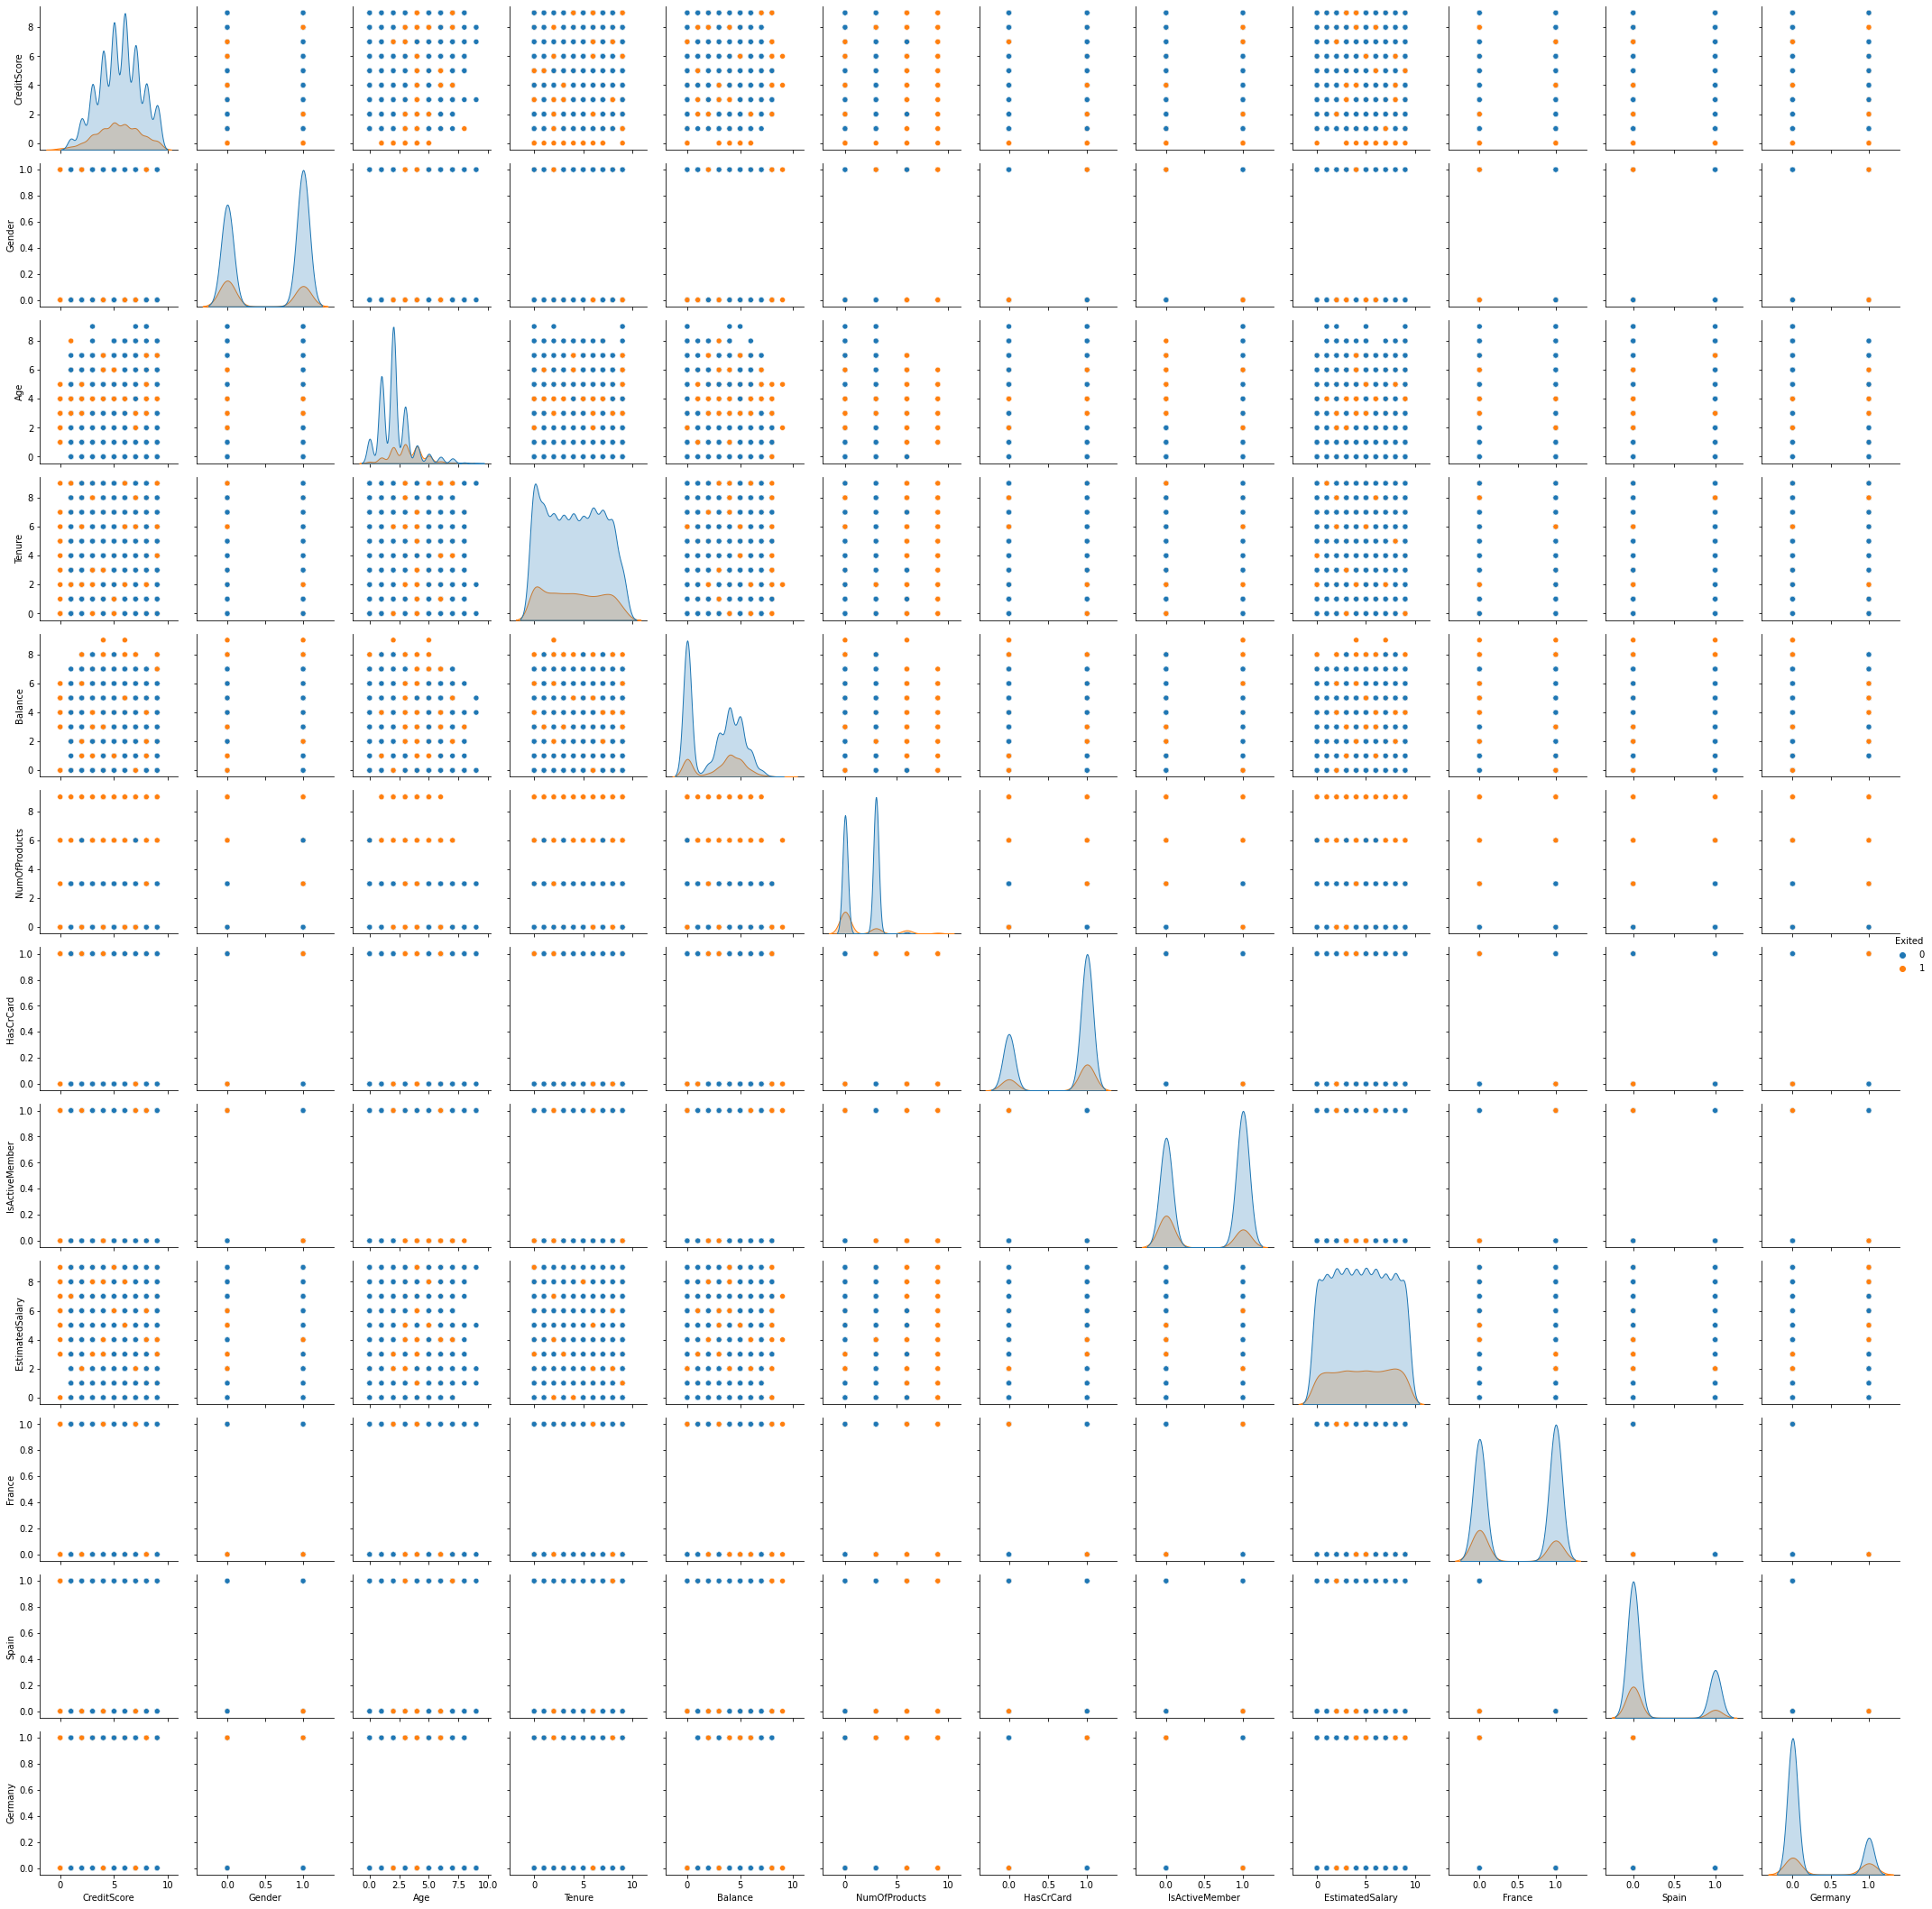

In [1499]:
pair=sns.pairplot(df,hue='Exited')


<AxesSubplot:>

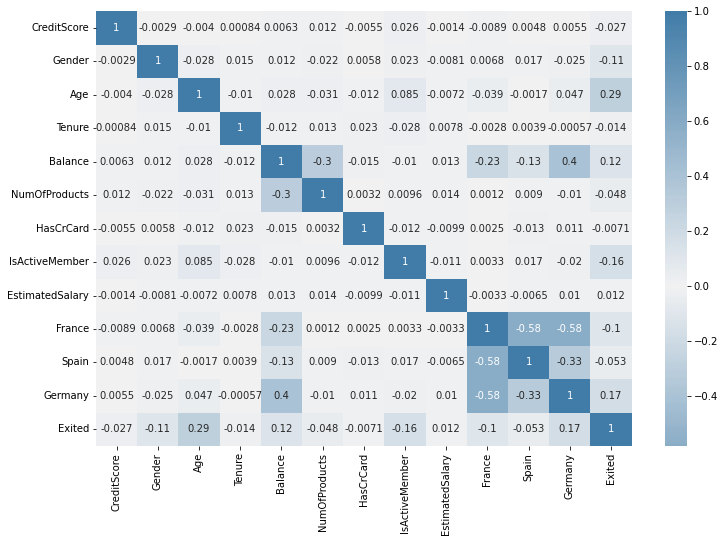

In [1306]:
fig, ax = plt.subplots(figsize=(12,8)) 
cmap=sns.diverging_palette(240, 240,center='light', as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap,annot=True,vmax=1,center=0)

In [1307]:
def sigmoid(h):
    return 1/(1+np.exp(-h))

def ReLU(H):
    return H*(H>0)

def softmax(H):
    eH=np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

def linear(H):
    return H

def derivatives(Z,a):
    
    if a == linear:
        return 1
    
    elif a == sigmoid:
        return Z*(1-Z)
    
    elif a == ReLU:
        return (Z>0).astype(int)
    
    elif a==np.tanh:
        return 1-Z*Z

    else: 
        ValueError('Unknown Activation Function')

In [1308]:
class ANN():
    
    def __init__(self,architecture, activations=None , mode=0):
        
        self.mode = mode
        self.architecture = architecture 
        self.activations = activations 
        self.L = len(architecture)+1
        
    def fit(self,X,y, eta=1e-3, epochs=1e3,show_curve=False):
        
        epochs = int(epochs)
        if self.mode:
            Y= y
        else:
            Y= y.reshape(len(y),1)
        #print(Y.shape)
        N,D = X.shape
        K= 1
        
        # Initalize your Weights and Biases 
        
        self.W = {l:np.random.randn(M[0],M[1]) for l,M in 
                  enumerate(zip(([D]+self.architecture),(self.architecture+[K])),1)}
        
        self.b = {l : np.random.randn(M) for l , M in enumerate(self.architecture+[K],1)}
        
        #Activation Funtions Loading
        
        if self.activations is None:
            self.a ={l:ReLU for l in range(1,self.L)}
        else:
            self.a = {l:act for l,act in enumerate(self.activations,1)}
            
        #Set Mode
        if self.mode:
            self.a[self.L] = linear
            
        else:
            self.a[self.L] = sigmoid
        
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            
            self.__forward__(X)
            
            if self.mode:
                J[epoch] = OLS(Y, self.Z[self.L])
                
            else:
                J[epoch] = bin_cross_entropy(Y,self.Z[self.L])
                
            dH = (1/N)*(self.Z[self.L]-Y)
            #print(f'aqui={dH.shape}')
            for l in sorted(self.W.keys(),reverse=True):
                #print(self.Z[l-1].shape)
                dW = self.Z[l-1].T@dH
                db = dH.sum(axis=0)
                
                #Weight and bias update rule
                self.W[l] -= eta*dW
                self.b[l] -= eta*db
                if l>1:
                    dZ = dH@self.W[l].T
                    dH = dZ*derivatives(self.Z[l-1], self.a[l-1])
                    
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel('$\mathcal{J}$')
            plt.show()
    
    def __forward__(self,X):
        
        self.Z = {0:X}
        
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])
            
    def predict(self, X, tresh=.5):
        
        self.__forward__(X)
        
        if self.mode:
            return self.Z[self.L]
        else:
            return (self.Z[self.L]>=tresh).astype(int)
                
        

### 
since there is no even quantity of exited we are going to use the same number of positives and exited. for it to be 50/50 sample cases

In [1309]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Spain',
       'Germany', 'Exited'],
      dtype='object')

In [1310]:
for column in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    
    df[column]=pd.cut(df[column],10,labels=False)

In [1311]:
df

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0               5       0    3       1        0              0          1   
1               5       0    3       0        3              0          0   
2               3       0    3       7        6              6          1   
3               6       0    2       0        0              3          0   
4               9       0    3       1        5              0          1   
...           ...     ...  ...     ...      ...            ...        ...   
9995            8       1    2       4        0              3          1   
9996            3       1    2       9        2              0          1   
9997            7       0    2       6        0              0          0   
9998            8       1    3       2        2              3          1   
9999            8       0    1       3        5              0          1   

      IsActiveMember  EstimatedSalary  France  Spain  Germany  Exited  
0                  1                5       1      0        0       1  
1                  1                5       0      1        0       0  
2                  0                5       1      0        0       1  
3                  0                4       1      0        0       0  
4                  1                3       0      1        0       0  
...              ...              ...     ...    ...      ...     ...  
9995               0                4       1      0        0       0  
9996               1                5       1      0        0       0  
9997               1                2       1      0        0       1  
9998               0                4       0      0        1       1  
9999               0                1       1      0        0       0  

[10000 rows x 13 columns]

In [1312]:
group=df.groupby('Exited')


In [1313]:
train_df=df.copy()
train_df=group.get_group(1)
train_df=pd.concat([train_df,group.get_group(0).sample(frac=.25)])


In [1314]:
# train test split 


#train_df.drop('Geography',axis=1,inplace=True)

X_train=train_df.sample(frac=.8)
X_validate=train_df.drop(X_train.index)
X_test=X_validate.sample(frac=.50)
X_validate=X_validate.drop(X_test.index)

X_train=X_train.to_numpy()
X_validate=X_validate.to_numpy()
X_test=X_test.to_numpy()


y_train=X_train[:,-1]
y_validate=X_validate[:,-1]
y_test=X_test[:,-1]

X_train=X_train[:,:-1]
X_validate=X_validate[:,:-1]
X_test=X_test[:,:-1]

In [1348]:
NN=ANN(architecture=[16,8,4,2],activations=[ReLU,ReLU,ReLU,ReLU])

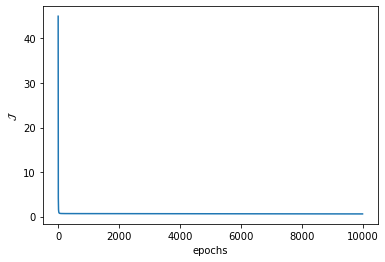

In [1352]:
NN.fit(X_train,y_train,eta=4e-3,epochs=10000,show_curve=True)

In [1353]:
NN.Z[NN.L].mean()

0.5245494127743809

In [1368]:
y_hat=NN.predict(X_train,tresh=.5245)

In [1369]:
accuracy(y_hat.reshape(len(y_hat)),y_train.reshape(len(y_hat)))

0.675667287399131

In [1370]:
df_1=pd.DataFrame({'real':y_train.reshape(len(y_hat)).astype(int),'predicted':y_hat.reshape(len(y_hat)).astype(int)})
gb=df_1.groupby('real')

In [1371]:
conf_mat=np.zeros([2,2])
for name,group in gb:
    value_counts=(group.value_counts())
    for col in range(len(value_counts)):
        column=value_counts.index[col][1]
        conf_mat[name,column]=value_counts.iloc[col]/len(group)
        

<AxesSubplot:>

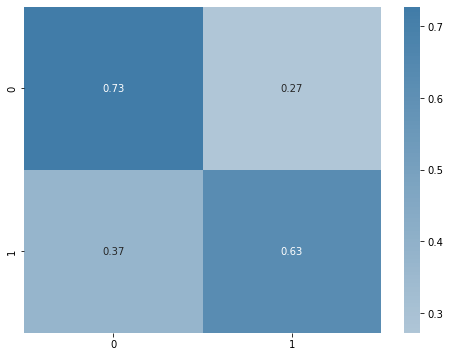

In [1372]:
fig, ax = plt.subplots(figsize=(8,6)) 
cmap=sns.diverging_palette(240, 240,center='light', as_cmap=True)
sns.heatmap(conf_mat,cmap=cmap,annot=True,center=0)

In [1373]:
NN.Z[5].mean()

0.5245470719908296

In [1492]:
y_hat=NN.predict(X_validate,tresh=.5)

In [1493]:
accuracy(y_hat,y_validate.reshape(y_hat.shape))

0.6625310173697271

<AxesSubplot:>

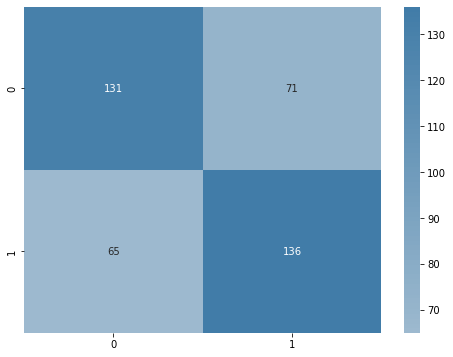

In [1495]:
df_1=pd.DataFrame({'real':y_validate.reshape(len(y_hat)).astype(int),'predicted':y_hat.reshape(len(y_hat)).astype(int)})
gb=df_1.groupby('real')

conf_mat=np.zeros([2,2])
for name,group in gb:
    value_counts=(group.value_counts())
    for col in range(len(value_counts)):
        column=value_counts.index[col][1]
        conf_mat[name,column]=value_counts.iloc[col]#/len(group)
        
fig, ax = plt.subplots(figsize=(8,6)) 
cmap=sns.diverging_palette(240, 240,center='light', as_cmap=True)
sns.heatmap(conf_mat,cmap=cmap,annot=True,center=0,fmt='.3g')
        

In [1479]:
precision=conf_mat[1,1]/(conf_mat[:,1].sum())
recall=conf_mat[1,1]/(conf_mat[1,:].sum())

f1=(2*conf_mat[1,1])/(2*conf_mat[1,1]+conf_mat[1,0]+conf_mat[0,1])
print(f'Precision:{precision} , Recall:{recall}, F1:{f1}')

Precision:0.6570048309178744 , Recall:0.6766169154228856, F1:0.6666666666666666


In [1496]:
y_hat=NN.predict(X_test,tresh=.5)
accuracy(y_test.reshape(y_hat.shape),y_hat)

0.6947890818858561

<AxesSubplot:>

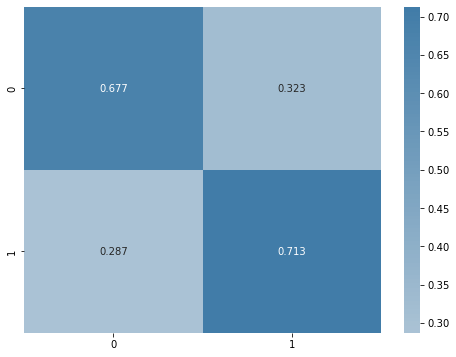

In [1498]:
df_1=pd.DataFrame({'real':y_test.reshape(len(y_hat)).astype(int),'predicted':y_hat.reshape(len(y_hat)).astype(int)})
gb=df_1.groupby('real')

conf_mat=np.zeros([2,2])
for name,group in gb:
    value_counts=(group.value_counts())
    for col in range(len(value_counts)):
        column=value_counts.index[col][1]
        conf_mat[name,column]=value_counts.iloc[col]/len(group)
        
fig, ax = plt.subplots(figsize=(8,6)) 
cmap=sns.diverging_palette(240, 240,center='light', as_cmap=True,)
sns.heatmap(conf_mat,cmap=cmap,annot=True,center=0,fmt='.3g')
        

In [1482]:
conf_mat[1,:].sum()

202.0

In [1483]:
conf_mat

array([[136.,  65.],
       [ 58., 144.]])

In [1484]:
precision=conf_mat[1,1]/(conf_mat[:,1].sum())

In [1485]:
recall=conf_mat[1,1]/(conf_mat[1,:].sum())

f1=(2*conf_mat[1,1])/(2*conf_mat[1,1]+conf_mat[1,0]+conf_mat[0,1])

In [1486]:
print(f'Precision:{precision} , Recall:{recall}, F1:{f1}')

Precision:0.6889952153110048 , Recall:0.7128712871287128, F1:0.7007299270072993


In [1489]:
NN.b

{1: array([-0.21460567,  0.40089886, -1.97299208,  0.48983966,  0.15583462,
        -0.54417412, -0.68086949,  0.06441186,  1.20265024,  2.86888367,
         1.44489842, -0.93290742, -1.3079592 ,  1.45355999, -1.03838879,
         0.81299544]),
 2: array([-1.58085092,  0.60923391,  1.67678417,  1.33037055, -1.38132892,
         1.41078387,  1.63943899, -1.02195624]),
 3: array([-0.29560207, -1.2018569 , -0.32089198,  0.050655  ]),
 4: array([-0.17819561, -0.22157965]),
 5: array([-0.5205842])}

In [1490]:
NN.W

{1: array([[-0.51386718,  0.42433205,  0.37708661,  1.08700237, -1.47117887,
         -0.67375408, -0.10979355, -1.18029238,  0.30766902, -1.23778607,
          0.30670601,  0.63282299,  1.85544653,  0.02171409, -1.54335979,
          0.30671604],
        [-0.10079743, -0.20791733, -0.16421215,  1.53268628,  1.68861633,
          0.78896711, -1.39066609,  0.66837791, -1.62119655, -0.0915808 ,
         -0.10933976, -1.26018622, -0.29518334, -0.90581417,  0.92699574,
          0.04932562],
        [ 0.48448388, -0.48103014, -1.33611152, -0.59618117,  0.7183387 ,
          1.42314277, -0.73181319,  1.3928429 , -1.08786708, -0.2743968 ,
          0.34594707,  0.87597409,  2.14649623, -0.47514399, -0.47717517,
         -0.99964196],
        [-1.39913407,  0.48354913, -0.88754443, -0.39968779,  1.44797643,
         -0.42714118, -0.8341037 , -0.82621346,  0.42173878, -0.2489933 ,
          0.65126586, -1.68642858,  0.76601065,  0.95351844, -0.62025731,
         -0.12357902],
        [ 1.39240

In [ ]:
df.columns